In [32]:
#Import Relevant Libraries
import random
import numpy as np
import cvxpy as cp

from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_histogram, plot_state_qsphere as plot_q
from qiskit.quantum_info import Statevector

from qiskit import quantum_info as qi
from toqito.channel_metrics import channel_fidelity

from toqito.state_metrics import fidelity
from toqito.channels import partial_trace as pt
from qiskit.quantum_info import DensityMatrix, state_fidelity, partial_trace

In [33]:
unitary_param_1 = np.array([])
#for i in range(0, 8):
#    unitary_param_1 = np.append(unitary_param_1, np.array([rand_numb(0,2*np.pi)]))
 
unitary_param_1 = [1.86051851, 3.72215261, 1.57043552, 5.48869762, 
                   2.30980358, 5.01476937, 0.5581273, 3.88907588]

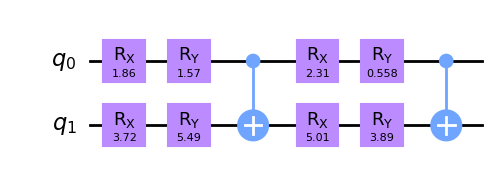

In [34]:
#State \rho_S
size = 2
layers = 2
state = QuantumCircuit(size)
for j in range(layers):
    for i in range(size):
        state.rx(unitary_param_1[j*size*2 + i], i)
        state.ry(unitary_param_1[j*2*size + i + size], i)

    for i in range(size-1):
        state.cx(i, i+1)

state.draw('mpl')

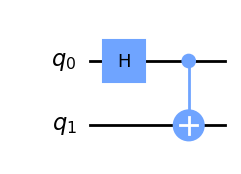

In [56]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

In [57]:
psi = np.array(DensityMatrix.from_instruction(qc.reverse_bits()))
rho = pt(psi, [2], [2, 2])

In [58]:
shape = rho.shape
Z = [[1, 0],[0, -1]]

X = cp.Variable(shape, complex=True)
sig = cp.Variable(shape, complex=True)
G = cp.bmat([[rho, X.H],[X, sig]])

c = [sig>>0, G>>0, cp.real(cp.trace(sig))==1]

c.append(Z@sig == sig@Z)

obj = cp.Maximize(cp.trace(cp.real(X)))
problem = cp.Problem(obj, constraints = c)
rootFid = problem.solve()
print("Root Fidelity is : " + str(rootFid))

WARN: A->p (column pointers) not strictly increasing, column 8 empty
WARN: A->p (column pointers) not strictly increasing, column 11 empty
Root Fidelity is : 0.9999978628991477


In [59]:
print("Fidelity is : " + str(rootFid**2))

Fidelity is : 0.9999957258028627
